The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


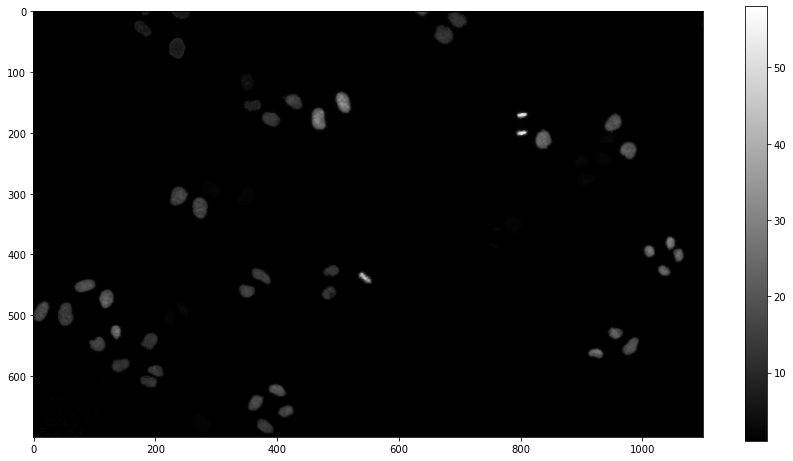

In [4]:
%load_ext autoreload
%autoreload 2
from Functions import image_processing as ip
import skimage.io as sk
import numpy as np
from Functions import unseeded_region_growing as urg
from Functions import seeded_region_growing as srg
from Functions import region_merging as rm
from Functions import dice_score as ds
from PIL import Image

image = sk.imread("Data/N2DL-HeLa/img/t13.tif")
image_urg = sk.imread("Result_Pictures/Unseeded_Region_Growing/N2DL-HeLa/urg_t13_50.tif")
ip.show_image(image_urg, 15, 8)
ground_truth = sk.imread("Data/N2DL-HeLa/gt/man_seg13.tif")
ground_truth_clipped = ip.image_clipping(ground_truth.copy(), 0, 1)

In [2]:
print(srg.unlabeled_pixel_exist(image_urg))
zeros = np.where(image_urg == 0)[0]
print(zeros)
#test2 = urg.unseeded_region_growing_algorithm(img_small,(0,0), 5)
#ip.show_image(test2, 15, 8)

False
[]


58
56
0.9265972856371474


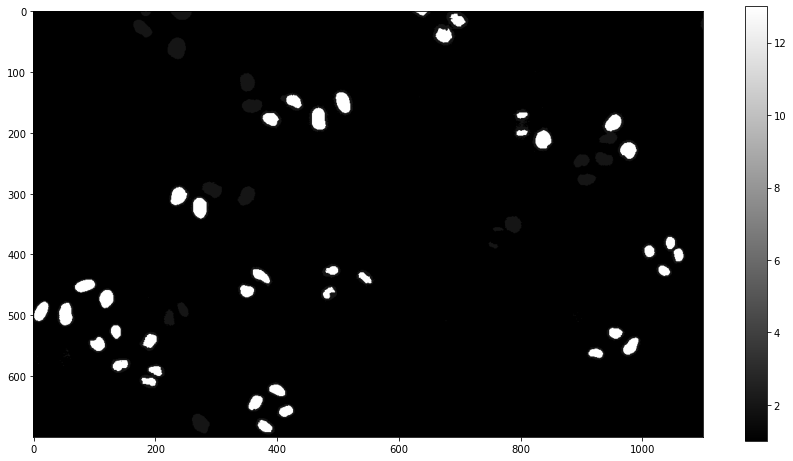

In [3]:
test3 = rm.region_merging(image_urg.copy(), image, 0.001, 10000)
ip.show_image(test3, 15, 8)

score_merging = ds.evaluate_accuracy_weighted(test3, ground_truth)
print(score_merging)

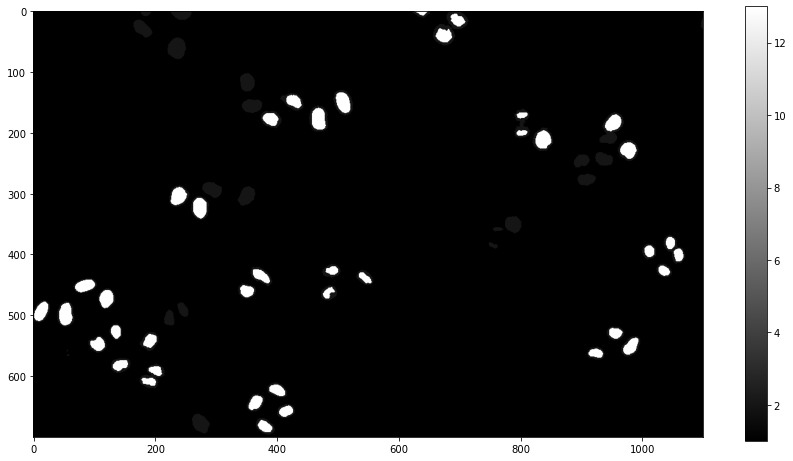

In [5]:
test4 = ip.median_filter(test3, 3)
ip.show_image(test4, 15, 8)

0.9276879800476109
0.9884766233766233


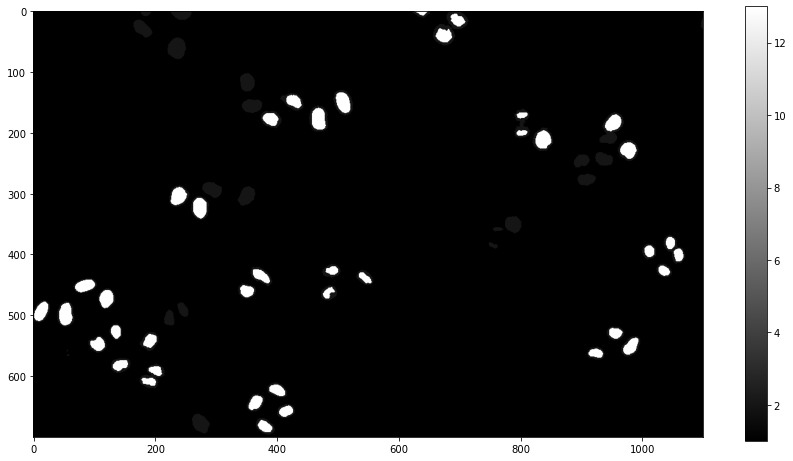

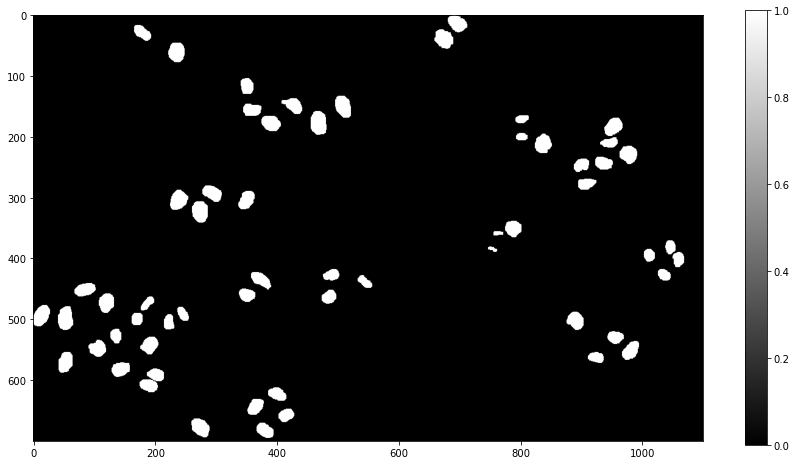

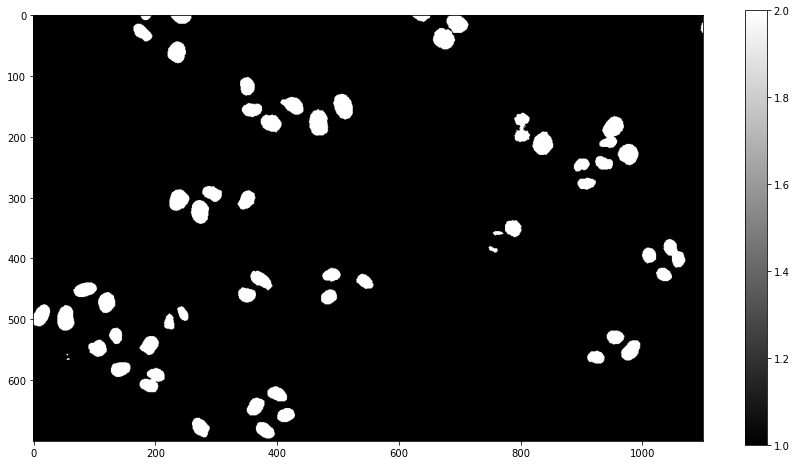

In [9]:
score = ds.evaluate_accuracy_weighted(test4, ground_truth)
print(score)
score2 = ds.evaluate_accuracy_unweighted(test4, ground_truth)
print(score2)
ip.show_image(test4, 15, 8)
ip.show_image(ground_truth_clipped, 15, 8)
ip.show_image(ip.image_clipping(test4, 1, 2), 15, 8)
test5 = ip.image_clipping(test4, 1, 2)

In [10]:
im = Image.fromarray(test5)
im.save("Result_Pictures/Unseeded_Region_Growing/N2DL-HeLa/urg_t13_clipped.tif")